In [1]:
# Import our dependencies

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
%matplotlib inline

In [3]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf



In [5]:
# List of tickers
tickers = ['AMZN', 'MSFT', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
msft_stock = stock_data['MSFT']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"MSFT :{len(msft_stock)},\n AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
MSFT :522,
 AMZN:501,
 VALE:501,
 AAPL:501 


In [6]:
vale_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,14.09,14.13,13.81,13.81,12.042349,20177800,VALE
1,2022-01-04,13.84,13.87,13.54,13.55,11.815628,41351400,VALE
2,2022-01-05,13.68,13.93,13.59,13.66,11.911547,58210800,VALE
3,2022-01-06,13.98,14.14,13.87,14.01,12.216749,29066000,VALE
4,2022-01-07,14.11,14.83,14.11,14.81,12.914351,45638800,VALE


In [7]:
#Using the Open Stock Price to be our traing dataset
training_set=vale_stock.iloc[:,1:2].values

training_set

array([[14.09    ],
       [13.84    ],
       [13.68    ],
       [13.98    ],
       [14.11    ],
       [14.85    ],
       [14.88    ],
       [15.5     ],
       [15.36    ],
       [15.06    ],
       [15.53    ],
       [16.139999],
       [16.370001],
       [15.93    ],
       [15.19    ],
       [15.44    ],
       [15.85    ],
       [15.79    ],
       [15.87    ],
       [15.36    ],
       [15.5     ],
       [16.07    ],
       [16.190001],
       [16.17    ],
       [16.799999],
       [17.120001],
       [17.129999],
       [17.709999],
       [17.629999],
       [17.6     ],
       [17.24    ],
       [17.34    ],
       [17.08    ],
       [16.870001],
       [16.92    ],
       [17.120001],
       [16.440001],
       [16.73    ],
       [17.6     ],
       [18.559999],
       [19.120001],
       [19.98    ],
       [19.450001],
       [20.76    ],
       [20.469999],
       [18.719999],
       [18.66    ],
       [19.4     ],
       [18.610001],
       [17.280001],


In [8]:
#Scalling our Dataset/Normailzing the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.22992299],
       [0.20242024],
       [0.18481848],
       [0.21782178],
       [0.23212321],
       [0.31353135],
       [0.31683168],
       [0.3850385 ],
       [0.36963696],
       [0.33663366],
       [0.38833883],
       [0.45544543],
       [0.48074818],
       [0.43234323],
       [0.35093509],
       [0.37843784],
       [0.42354235],
       [0.41694169],
       [0.42574257],
       [0.36963696],
       [0.3850385 ],
       [0.44774477],
       [0.4609462 ],
       [0.45874587],
       [0.5280527 ],
       [0.56325644],
       [0.56435633],
       [0.62816271],
       [0.61936183],
       [0.61606161],
       [0.57645765],
       [0.58745875],
       [0.55885589],
       [0.53575369],
       [0.54125413],
       [0.56325644],
       [0.48844895],
       [0.52035204],
       [0.61606161],
       [0.72167206],
       [0.78327844],
       [0.87788779],
       [0.81958207],
       [0.96369637],
       [0.93179307],
       [0.73927382],
       [0.73267327],
       [0.814

In [9]:
#Setting up our features and target variables

X_train = []
y_train = []


for i in range(60,501):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

    

X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
Apple_stock.shape

(501, 8)

In [11]:
print(X_train.shape)
print(y_train.shape)

(441, 60)
(441,)


In [12]:
X_train

array([[0.22992299, 0.20242024, 0.18481848, ..., 0.90209032, 0.86358636,
        0.85258526],
       [0.20242024, 0.18481848, 0.21782178, ..., 0.86358636, 0.85258526,
        0.89878988],
       [0.18481848, 0.21782178, 0.23212321, ..., 0.85258526, 0.89878988,
        0.90429032],
       ...,
       [0.14631463, 0.11331133, 0.09460946, ..., 0.40044004, 0.43124312,
        0.43674367],
       [0.11331133, 0.09460946, 0.07920792, ..., 0.43124312, 0.43674367,
        0.43564356],
       [0.09460946, 0.07920792, 0.07810781, ..., 0.43674367, 0.43564356,
        0.43344334]])

In [13]:
y_train

array([0.89878988, 0.90429032, 0.92299219, 1.        , 0.97799769,
       0.91969208, 0.90539054, 0.92629263, 0.88008801, 0.93509351,
       0.87018702, 0.84708482, 0.81298119, 0.75797569, 0.71177107,
       0.69746975, 0.62266227, 0.45544543, 0.43124312, 0.45324543,
       0.4840484 , 0.61276128, 0.49064895, 0.50385039, 0.46644664,
       0.49724972, 0.41034103, 0.3410341 , 0.330033  , 0.35973597,
       0.31243124, 0.35093509, 0.40374037, 0.48184807, 0.41034103,
       0.43454345, 0.51155116, 0.57425732, 0.54455457, 0.57645765,
       0.57755776, 0.64796469, 0.69636964, 0.67436733, 0.72937283,
       0.72827294, 0.74037404, 0.68316821, 0.71947206, 0.61166106,
       0.51045094, 0.45654565, 0.43344334, 0.43454345, 0.40814081,
       0.35863586, 0.3190319 , 0.24092409, 0.30143014, 0.21892189,
       0.29372937, 0.35973597, 0.35093509, 0.29922992, 0.24642464,
       0.17711771, 0.19581958, 0.26622662, 0.28712871, 0.19031903,
       0.13421342, 0.15511551, 0.09350935, 0.0440044 , 0.10561

In [14]:
#Reshaping the dataset
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(441, 60, 1)

In [15]:
regressor = Sequential()
regressor

In [16]:
# Adding Layers into the model 

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100

14/14 [==============================] - 9s 60ms/step - loss: 0.0432
Epoch 2/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0209
Epoch 3/100
14/14 [==============================] - 1s 61ms/step - loss: 0.0194
Epoch 4/100
14/14 [==============================] - 1s 60ms/step - loss: 0.0175
Epoch 5/100
14/14 [==============================] - 1s 60ms/step - loss: 0.0167
Epoch 6/100
14/14 [==============================] - 1s 60ms/step - loss: 0.0153
Epoch 7/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0145
Epoch 8/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0134
Epoch 9/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0142
Epoch 10/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0147
Epoch 11/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0126
Epoch 12/100
14/14 [==============================] - 1s 61ms/step - loss: 0.0121
Epoch 13/100
14/14 [===

14/14 [==============================] - 1s 59ms/step - loss: 0.0039
Epoch 97/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0041
Epoch 98/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0044
Epoch 99/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0039
Epoch 100/100
14/14 [==============================] - 1s 59ms/step - loss: 0.0041


In [38]:
# Loading the Stock Prices for Jan-2024
Vale_ticker_test = Path("../Resources/Vale_Test.csv")
Vale_stock_Test = pd.read_csv(Vale_ticker_test)
Vale_stock_Test["Ticker"]= "Vale_Test"  

Vale_stock_Test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2024-01-02,15.88,15.99,15.58,15.71,15.71,15975000,Vale_Test
1,2024-01-03,15.44,15.66,15.42,15.62,15.62,15678800,Vale_Test
2,2024-01-04,15.44,15.52,15.35,15.43,15.43,17245100,Vale_Test
3,2024-01-05,15.26,15.40,15.20,15.30,15.30,14499600,Vale_Test
4,2024-01-08,15.12,15.30,15.05,15.27,15.27,13374700,Vale_Test


In [39]:
#Extracting our 2024 Data for open price
actual_stock_price = Vale_stock_Test.iloc[:,1:2].values
actual_stock_price
# actual_stock_price.shape

array([[15.88],
       [15.44],
       [15.44],
       [15.26],
       [15.12],
       [15.03],
       [14.76],
       [14.89],
       [14.95],
       [14.5 ],
       [14.11],
       [14.12],
       [13.93],
       [13.55],
       [13.92],
       [14.4 ],
       [14.18],
       [13.94],
       [13.97],
       [13.84],
       [13.79]])

In [40]:
#Preping our Data
dataset_total=pd.concat((vale_stock['Open'],Vale_stock_Test['Open']),axis  =0)
inputs=dataset_total[len(dataset_total)-len(Vale_stock_Test)-60:].values

inputs
inputs = inputs.reshape(-1,1)
inputs= scaler.transform(inputs)


X_test = []

for i in range(60,81):
    X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test

array([[[0.07920792],
        [0.07810781],
        [0.08690869],
        ...,
        [0.43564356],
        [0.43344334],
        [0.41914191]],

       [[0.07810781],
        [0.08690869],
        [0.12431243],
        ...,
        [0.43344334],
        [0.41914191],
        [0.42684268]],

       [[0.08690869],
        [0.12431243],
        [0.13971397],
        ...,
        [0.41914191],
        [0.42684268],
        [0.37843784]],

       ...,

       [[0.15731573],
        [0.20682068],
        [0.26292629],
        ...,
        [0.2640264 ],
        [0.23982398],
        [0.21342134]],

       [[0.20682068],
        [0.26292629],
        [0.27722772],
        ...,
        [0.23982398],
        [0.21342134],
        [0.21672167]],

       [[0.26292629],
        [0.27722772],
        [0.28932893],
        ...,
        [0.21342134],
        [0.21672167],
        [0.20242024]]])

In [41]:
actual_stock_price[1]

array([15.44])

In [42]:
X_test[2][-1]

array([0.37843784])

In [43]:
inputs.shape

(81, 1)

In [44]:
#Predicting the Values for Jan 2024
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 40ms/step


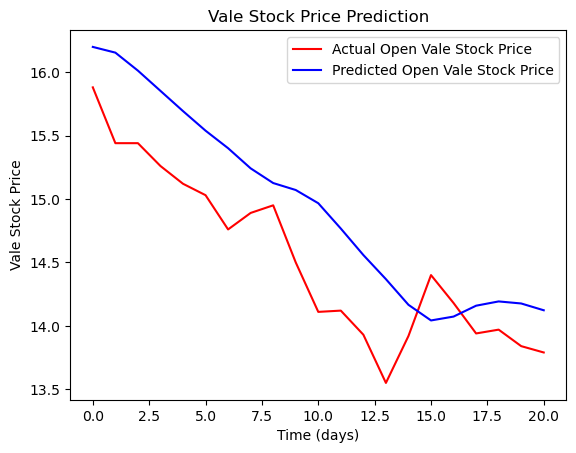

In [45]:
#Plotting the Data

plt.plot(actual_stock_price, color ='red', label ="Actual Open Vale Stock Price")
plt.plot(predicted_stock_price, color ='blue', label ="Predicted Open Vale Stock Price")
plt.title('Vale Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Vale Stock Price')
plt.legend()

In [46]:
predicted_stock_price, actual_stock_price

(array([[16.198757],
        [16.153728],
        [16.011824],
        [15.852252],
        [15.69281 ],
        [15.53848 ],
        [15.400343],
        [15.241486],
        [15.125676],
        [15.070769],
        [14.966552],
        [14.766786],
        [14.558113],
        [14.368036],
        [14.165796],
        [14.042524],
        [14.072977],
        [14.158788],
        [14.192459],
        [14.176294],
        [14.122752]], dtype=float32),
 array([[15.88],
        [15.44],
        [15.44],
        [15.26],
        [15.12],
        [15.03],
        [14.76],
        [14.89],
        [14.95],
        [14.5 ],
        [14.11],
        [14.12],
        [13.93],
        [13.55],
        [13.92],
        [14.4 ],
        [14.18],
        [13.94],
        [13.97],
        [13.84],
        [13.79]]))

In [47]:
Vale_stock_Test["Predicted Stock Price"] = predicted_stock_price
Vale_stock_Test

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Predicted Stock Price
0,2024-01-02,15.88,15.99,15.58,15.71,15.71,15975000,Vale_Test,16.198757
1,2024-01-03,15.44,15.66,15.42,15.62,15.62,15678800,Vale_Test,16.153728
2,2024-01-04,15.44,15.52,15.35,15.43,15.43,17245100,Vale_Test,16.011824
3,2024-01-05,15.26,15.40,15.20,15.30,15.30,14499600,Vale_Test,15.852252
4,2024-01-08,15.12,15.30,15.05,15.27,15.27,13374700,Vale_Test,15.692810
5,2024-01-09,15.03,15.07,14.90,14.93,14.93,13918600,Vale_Test,15.538480
6,2024-01-10,14.76,14.80,14.69,14.77,14.77,16025000,Vale_Test,15.400343
7,2024-01-11,14.89,14.93,14.73,14.88,14.88,20917800,Vale_Test,15.241486
8,2024-01-12,14.95,15.02,14.73,14.77,14.77,15322900,Vale_Test,15.125676
9,2024-01-16,14.50,14.54,14.25,14.31,14.31,27908400,Vale_Test,15.070769


In [48]:
predicted_stock_price.shape

(21, 1)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(Vale_stock_Test["Open"], predicted_stock_price)
mse

0.26200941891015866

In [51]:
rmse = np.sqrt(mse)
rmse

0.5118685562819411